# 決定木

## 1.単純なデータを用いた決定木の構築

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_dict = {
    'f1': [1, 1, 1, 1, 0, 0, 1, 1, 1, 0],
    'f2': [0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
    'f3': [0, 1, 0, 0, 0, 0, 0, 1, 1, 1],
    'f4': [1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
    'target': [1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
}

data_df = pd.DataFrame(data_dict)
data_df

,f1,f2,f3,f4,target
0,1,0,0,1,1
1,1,0,1,1,1
2,1,0,0,0,1
3,1,1,0,1,1
4,0,1,0,0,1
5,0,1,0,1,1
6,1,1,0,0,0
7,1,1,1,0,0
8,1,0,1,1,0
9,0,0,1,1,0


In [3]:
X = data_df.iloc[:, :4].values
y = data_df['target'].values

### 評価指標にエントロピーを用いる

In [4]:
from sklearn.tree import DecisionTreeClassifier

entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X, y);

In [5]:
entropy_tree.predict(X)

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0])

In [6]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(entropy_tree,
                          filled=True,
                          rounded=True,
                          class_names=['1', '0'],
                          feature_names=['f1', 'f2', 'f3', 'f4'],
                          out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('entropy_tree.png');

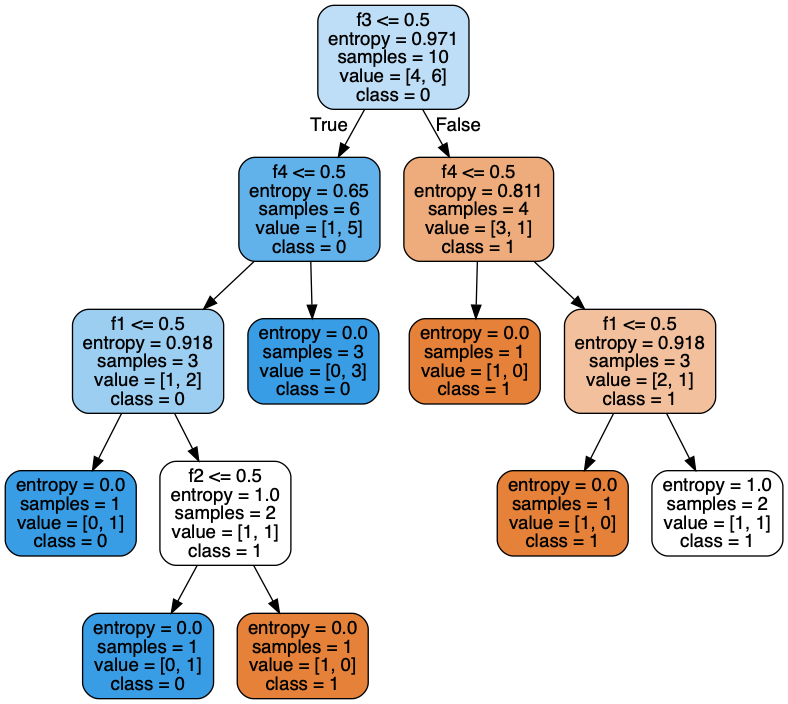

In [7]:
from IPython.display import Image, display_png
display_png(Image('entropy_tree.png', width=300))

### 評価指標にジニ不順度を用いる

In [8]:
gini_tree = DecisionTreeClassifier(criterion='gini')
gini_tree.fit(X, y);

In [9]:
gini_tree.predict(X)

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0])

In [10]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(gini_tree,
                          filled=True,
                          rounded=True,
                          class_names=['1', '0'],
                          feature_names=['f1', 'f2', 'f3', 'f4'],
                          out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('gini_tree.png');

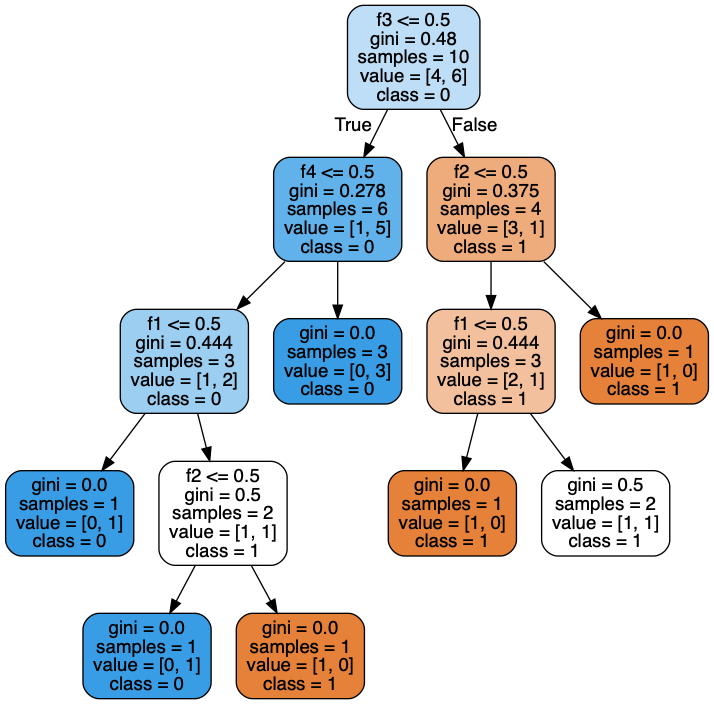

In [11]:
display_png(Image('gini_tree.png', width=300))

## 2. 決定木の応用

メルカリに出品された製品の特徴から値段を予測するタスクについて考える。

データはhttps://www.kaggle.com/c/mercari-price-suggestion-challenge　にあるものを用いる。

モデルはRandom Forestを用いる。

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [13]:
types_dict_data = {'train_id': 'int64',
             'item_condition_id': 'int8',
             'price': 'float64',
             'shipping': 'int8'}

data = pd.read_csv('mercari/train.tsv', delimiter='\t', low_memory= True, dtype=types_dict_data)

In [14]:
data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [15]:
data.category_name = data.category_name.astype('category')
data.item_description = data.item_description.astype('category')
data.name = data.name.astype('category')
data.brand_name =data.brand_name.astype('category')

In [16]:
# 各種カラムの変換
data.category_name = data.category_name.astype('category')
data.item_description = data.item_description.astype('category')

In [17]:
#  不要なカラムの削除
data = data.drop(['item_description'],axis = 1)
# カラムの型変換
data.name = data.name.cat.codes
data.category_name = data.category_name.cat.codes
data.brand_name = data.brand_name.cat.codes

In [18]:
data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping
0,0,640809,3,808,-1,10.0,1
1,1,903932,3,86,3557,52.0,0
2,2,91532,1,1254,4180,10.0,1
3,3,561143,1,485,-1,35.0,1
4,4,45483,1,1181,-1,44.0,0


In [19]:
# 値段データの処理
data['price'] = data['price'].apply(lambda x: np.log(x) if x>0 else x)

In [20]:
data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping
0,0,640809,3,808,-1,2.302585,1
1,1,903932,3,86,3557,3.951244,0
2,2,91532,1,1254,4180,2.302585,1
3,3,561143,1,485,-1,3.555348,1
4,4,45483,1,1181,-1,3.784190,0


In [21]:
# 訓練データ、検証データに分ける
msk = np.random.rand(len(data)) < 0.8

df_train = data[msk]
df_val = data[~msk]

In [22]:
# 学習させるデータの抽出
x_train, y_train = df_train.drop(['price'],axis =1), df_train.price
x_val,y_val = df_val.drop(['price'],axis =1),df_val.price

In [23]:
# Random Forestで学習
m = RandomForestRegressor(n_jobs=-1, min_samples_leaf=3, n_estimators=200)
m.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [24]:
# 訓練データに対しての評価
print(m.score(x_train, y_train))

# 検証データに対しての評価
print(m.score(x_val, y_val))

0.7901334378183812
0.47648236585349973


今回のモデルは過学習していることがわかる。